In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os

# Load the CSV file
file_path = "/content/drive/MyDrive/traffic data/social status merge/Estimates_v23_Population_by_2020_Census_Tract_20250424.csv"
df = pd.read_csv(file_path)

# Filter to only "Household Population"
filtered_df = df[df['long_name'] == 'Household Population']

# Group by 'yr_id'
grouped = filtered_df.groupby('yr_id')

# Loop through each group and save to separate folders
base_output_dir = "/content/drive/MyDrive/traffic data/social status merge/by_year"

for year, group in grouped:
    # Create a subfolder for the year
    output_dir = os.path.join(base_output_dir, str(year))
    os.makedirs(output_dir, exist_ok=True)

    # Save the group to CSV inside that year's folder
    output_path = os.path.join(output_dir, f"household_population_{year}.csv")
    group.to_csv(output_path, index=False)

    print(f"✅ Saved: {output_path}")


✅ Saved: /content/drive/MyDrive/traffic data/social status merge/by_year/2020/household_population_2020.csv
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/by_year/2021/household_population_2021.csv
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/by_year/2022/household_population_2022.csv
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/by_year/2023/household_population_2023.csv


In [ ]:
import pandas as pd
import os

# Load your data
file_path = "/content/drive/MyDrive/traffic data/social status merge/Estimates_v23.1_Household_Income_by_2020_Census_Tract_20250424.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Rename for consistency if needed
df = df.rename(columns={
    'census_tract': 'tract',
    'long_name': 'name',
    'value': 'households'
})

# Pivot to wide format: one row per tract per year
pivoted = df.pivot_table(
    index=['tract', 'yr_id'],
    columns='name',
    values='households',
    fill_value=0
).reset_index()

# Remove MultiIndex from columns
pivoted.columns.name = None

# Save to CSVs split by year
output_base = "/content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year"
os.makedirs(output_base, exist_ok=True)

# Group by year and save each year as a separate file
for year, group in pivoted.groupby('yr_id'):
    output_path = f"{output_base}/income_by_tract_{year}.csv"
    group.to_csv(output_path, index=False)
    print(f"✅ Saved: {output_path} ({len(group)} rows)")



✅ Saved: /content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year/income_by_tract_2020.csv (736 rows)
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year/income_by_tract_2021.csv (736 rows)
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year/income_by_tract_2022.csv (736 rows)
✅ Saved: /content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year/income_by_tract_2023.csv (736 rows)


In [ ]:
import pandas as pd

# Load the data
file_path = "/content/drive/MyDrive/traffic data/social status merge/2020_Census_Population_by_Age_by_2020_Census_Tract_20250424.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Pivot to wide format: one row per tract-year
pivoted = df.pivot_table(
    index=['tract', 'yr_id'],
    columns='name',
    values='population',
    fill_value=0
).reset_index()

# Remove the column index name
pivoted.columns.name = None

# Save the result to CSV
output_path = "/content/drive/MyDrive/traffic data/social status merge/population_by_age_2020_pivoted.csv"
pivoted.to_csv(output_path, index=False)

print(f"✅ Pivoted CSV saved to: {output_path}")


✅ Pivoted CSV saved to: /content/drive/MyDrive/traffic data/social status merge/population_by_age_2020_pivoted.csv


In [ ]:
import pandas as pd

# Load the three files
age_path = "/content/drive/MyDrive/traffic data/social status merge/population_by_age_2020_pivoted.csv"
income_path = "/content/drive/MyDrive/traffic data/social status merge/income_pivot_by_year/income_by_tract_2020.csv"
household_path = "/content/drive/MyDrive/traffic data/social status merge/population_by_year/2020/household_population_2020.csv"

df_age = pd.read_csv(age_path)
df_income = pd.read_csv(income_path)
df_household = pd.read_csv(household_path)

# Clean column names
df_household.columns = df_household.columns.str.strip()
if 'long_name' in df_household.columns:
    df_household = df_household.drop(columns=['long_name'])

# Merge all three DataFrames on 'tract'
merged = df_age.merge(df_income, on='tract', suffixes=('', '_income'))
merged = merged.merge(df_household, on='tract', suffixes=('', '_household'))

# Drop extra yr_id columns if they exist and keep only one
if 'yr_id_income' in merged.columns:
    merged = merged.drop(columns=['yr_id_income'])
if 'yr_id_household' in merged.columns:
    merged = merged.drop(columns=['yr_id_household'])

# Confirm that the remaining yr_id is consistent (optional check)
print("✅ Unique years in merged dataset:", merged['yr_id'].unique())

# Show result
print("✅ Merged data preview:")
print(merged.head())


✅ Unique years in merged dataset: [2020]
✅ Merged data preview:
   tract  yr_id  10 to 14  15 to 17  18 and 19  20 to 24  25 to 29  30 to 34  \
0   1.00   2020     171.0      77.0       51.0     111.0      72.0      79.0   
1   2.01   2020      74.0      38.0       16.0      41.0     110.0     149.0   
2   2.02   2020     138.0      81.0       41.0     200.0     411.0     495.0   
3   3.01   2020      26.0      14.0       13.0     106.0     274.0     330.0   
4   3.02   2020      26.0      23.0       10.0     107.0     324.0     370.0   

   35 to 39  40 to 44  ...  $125,000 to $149,999  $15,000 to $29,999  \
0     151.0     194.0  ...                 127.0                 0.0   
1     156.0     157.0  ...                  13.0               149.0   
2     439.0     347.0  ...                 112.0               321.0   
3     245.0     158.0  ...                 112.0                89.0   
4     307.0     193.0  ...                  72.0                67.0   

   $150,000 to $199,99

In [ ]:
# Define output path
output_path = "/content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv"

# Save the merged DataFrame to CSV
merged.to_csv(output_path, index=False)

print(f"✅ Merged data saved to: {output_path}")


✅ Merged data saved to: /content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv


In [ ]:
import pandas as pd

# === Step 1: Load all files ===
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_with_census_tract.csv")
client_count = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_with_client_count.csv")
social_data = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv")

# === Step 2: Ensure census tract columns are float and clean ===
collisions['census_tract'] = pd.to_numeric(collisions['census_tract'], errors='coerce')
client_count['census_tract'] = pd.to_numeric(client_count['census_tract'], errors='coerce')
social_data['tract'] = pd.to_numeric(social_data['tract'], errors='coerce')  # keep as float

# === Step 3: Merge Client Count
merged = pd.merge(
    collisions,
    client_count[['census_tract', 'Client Count']],
    on='census_tract',
    how='left'
)

# === Step 4: Merge Social Data (on float tract column)
merged = pd.merge(
    merged,
    social_data,
    left_on='census_tract',
    right_on='tract',
    how='left',
    suffixes=('', '_social')
)

# === Step 5: Print unmatched info

# Unmatched client counts
unmatched_client = merged[merged['Client Count'].isna()]
print(f"❌ Unmatched Client Count rows: {len(unmatched_client)}")
print(unmatched_client[['CASE_ID', 'census_tract']].head())

# Unmatched social data
unmatched_social = merged[merged['tract'].isna()]
print(f"❌ Unmatched Social Data rows: {len(unmatched_social)}")
print(unmatched_social[['CASE_ID', 'census_tract']].head())

# === Optional: Confirm final row count
print(f"✅ Final merged dataset size: {len(merged)}")


❌ Unmatched Client Count rows: 2340
     CASE_ID  census_tract
46   5639619        155.01
92   5639818        170.61
205  5639956        191.09
211  5890297        213.06
383  5903367         83.39
❌ Unmatched Social Data rows: 3
         CASE_ID  census_tract
166649  82260433        148.00
351943   9289329         16.01
374324   9426679        124.00
✅ Final merged dataset size: 459683


In [ ]:
duplicate_rows = merged[merged.duplicated(subset=['CASE_ID'], keep=False)]
print(f"🔁 Duplicate rows based on CASE_ID: {len(duplicate_rows)}")


🔁 Duplicate rows based on CASE_ID: 457338


In [ ]:
merged = merged.drop_duplicates()


In [ ]:
output_path = "/content/drive/MyDrive/traffic data/collisions_merged.csv"
merged.to_csv(output_path, index=False)
print(f"✅ Cleaned and saved to: {output_path}")


✅ Cleaned and saved to: /content/drive/MyDrive/traffic data/collisions_merged.csv


In [ ]:
#check vif
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load your dataset
output_path = "/content/drive/MyDrive/traffic data/collisions_merged.csv"
df = pd.read_csv(output_path)

# Optional: Drop non-numeric or target columns if needed
# For example: df = df.drop(columns=['target_column', 'non_numeric_column'])

# Keep only numeric columns
numeric_df = df.select_dtypes(include=[float, int]).dropna()

# Add constant for intercept
X = add_constant(numeric_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Feature        VIF
0                CASE_ID   1.161484
1                POINT_X   2.586541
2                POINT_Y   3.292293
3            index_right   1.270253
4                  GEOID   1.128534
5           census_tract        inf
6           Client Count   1.628377
7                  tract        inf
8                  yr_id   0.000000
9               10 to 14  55.828337
10              15 to 17  33.930507
11             18 and 19   5.665759
12              20 to 24   4.251151
13              25 to 29  12.369723
14              30 to 34  26.757160
15              35 to 39  18.423089
16              40 to 44  18.814122
17              45 to 49  25.032972
18                5 to 9  50.706145
19              50 to 54  22.326547
20              55 to 59  20.519333
21             60 and 61  10.933550
22              62 to 64  20.128545
23              65 to 69  17.738472
24              70 to 74  14.266918
25              75 to 79  12.239593
26              80 to 84  10

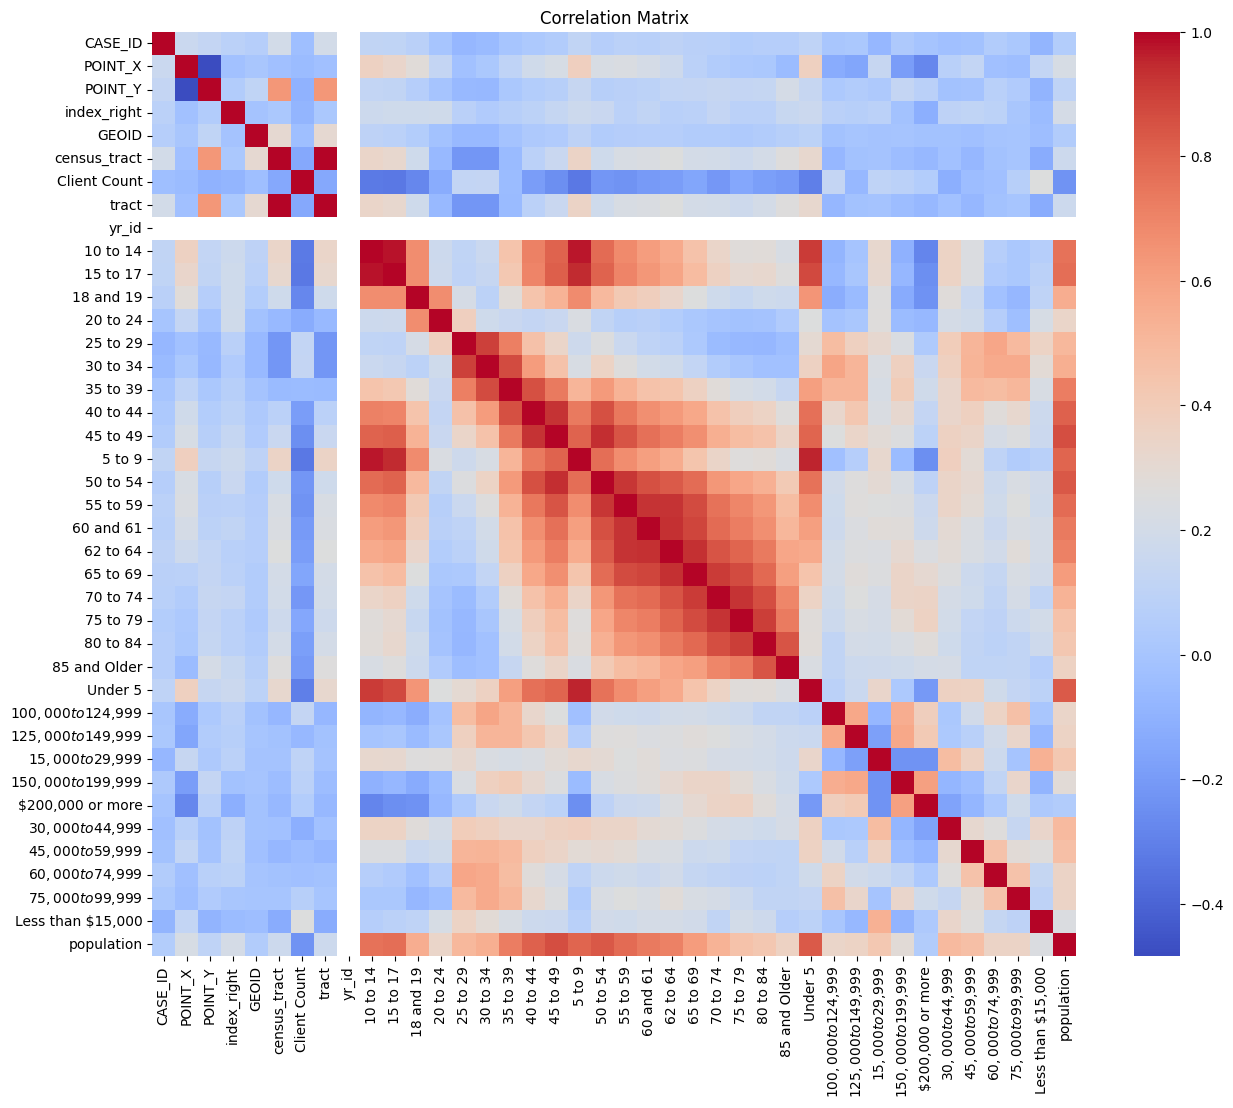

In [ ]:
#find correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Only use numeric columns
numeric_df = df.select_dtypes(include=[float, int]).dropna()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot it
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#find top coorleation  Unstack and sort correlation values
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlation (value = 1)
filtered_corr = corr_pairs[corr_pairs < 1]

# Show top 10 most correlated pairs
top_corr = filtered_corr.drop_duplicates().head(10)
print(top_corr)


15 to 17  10 to 14     0.977178
5 to 9    10 to 14     0.971144
Under 5   5 to 9       0.957241
15 to 17  5 to 9       0.946834
50 to 54  45 to 49     0.939125
62 to 64  65 to 69     0.934450
          60 and 61    0.932418
75 to 79  70 to 74     0.927066
55 to 59  60 and 61    0.926605
45 to 49  40 to 44     0.926003
dtype: float64


In [ ]:
# Drop columns with high VIF
cols_to_drop = [
    '10 to 14', '5 to 9', '15 to 17', '30 to 34', '45 to 49',
    '50 to 54', '55 to 59', '62 to 64', 'Under 5',
    'census_tract', 'tract'
]

# Keep only needed columns
reduced_df = df.drop(columns=cols_to_drop)

# Optional: Drop non-numeric or ID columns you don't want
# reduced_df = reduced_df.drop(columns=['CASE_ID', 'yr_id'])  # If needed

# Keep only numeric again
numeric_df = reduced_df.select_dtypes(include=[float, int]).dropna()

# Recalculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(numeric_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Feature        VIF
0                CASE_ID   1.146717
1                POINT_X   2.067800
2                POINT_Y   1.749986
3            index_right   1.183315
4                  GEOID   1.033755
5           Client Count   1.521343
6                  yr_id   0.000000
7              18 and 19   4.284741
8               20 to 24   3.071144
9               25 to 29   6.312075
10              35 to 39  11.704187
11              40 to 44  10.764876
12             60 and 61   7.354132
13              65 to 69  13.040845
14              70 to 74  13.451737
15              75 to 79  12.037636
16              80 to 84  10.362783
17          85 and Older   4.221476
18  $100,000 to $124,999   2.330065
19  $125,000 to $149,999   2.328378
20    $15,000 to $29,999   2.564580
21  $150,000 to $199,999   2.855671
22      $200,000 or more   2.297599
23    $30,000 to $44,999   1.835877
24    $45,000 to $59,999   1.987906
25    $60,000 to $74,999   2.080516
26    $75,000 to $99,999   1

In [ ]:


# STEP 2: List of features to keep (VIF < 10)
features_to_keep = [
    "CASE_ID", "POINT_X", "POINT_Y", "index_right", "GEOID", "Client Count", "yr_id",
    "18 and 19", "20 to 24", "25 to 29", "60 and 61", "85 and Older",
    "$100,000 to $124,999", "$125,000 to $149,999", "$15,000 to $29,999",
    "$150,000 to $199,999", "$200,000 or more", "$30,000 to $44,999",
    "$45,000 to $59,999", "$60,000 to $74,999", "$75,000 to $99,999",
    "Less than $15,000", "population"
]

# STEP 3: Create new DataFrame with selected features
new_df = df[features_to_keep].copy()

# Optional: Drop missing values if necessary
new_df = new_df.dropna()

# STEP 4: Recalculate VIF on the new DataFrame
X = add_constant(new_df)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF results
print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                 Feature       VIF
0                CASE_ID  1.133815
1                POINT_X  1.998620
2                POINT_Y  1.710898
3            index_right  1.154736
4                  GEOID  1.029709
5           Client Count  1.472831
6                  yr_id  0.000000
7              18 and 19  3.894818
8               20 to 24  2.492093
9               25 to 29  4.770342
10             60 and 61  3.593880
11          85 and Older  1.611037
12  $100,000 to $124,999  2.250366
13  $125,000 to $149,999  2.171743
14    $15,000 to $29,999  2.384971
15  $150,000 to $199,999  2.671307
16      $200,000 or more  2.082240
17    $30,000 to $44,999  1.766887
18    $45,000 to $59,999  1.798171
19    $60,000 to $74,999  1.974959
20    $75,000 to $99,999  1.750985
21     Less than $15,000  1.849792
22            population  6.821949


In [ ]:
import pandas as pd

# Load all datasets
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_merged.csv")
parties = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")
victims = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Victims.csv")

# Step 1: Select only the variables you want
parties_vars = [
    "CASE_ID", "PARTY_NUMBER", "PARTY_TYPE", "AT_FAULT", "PARTY_SEX", "PARTY_AGE",
    "PARTY_DRUG_PHYSICAL", "PARTY_SOBRIETY", "DIR_OF_TRAVEL", "SP_INFO_2",
    "VEHICLE_YEAR", "VEHICLE_MAKE", "RACE"
]

victims_vars = [
    "CASE_ID", "VICTIM_SEX", "VICTIM_AGE", "VICTIM_DEGREE_OF_INJURY"
]

parties = parties[parties_vars]
victims = victims[victims_vars]

# Step 2: Keep only one record per CASE_ID (the first one)
parties = parties.drop_duplicates(subset='CASE_ID', keep='first')
victims = victims.drop_duplicates(subset='CASE_ID', keep='first')

# Step 3: Merge with collisions based on CASE_ID
merged = collisions.merge(parties, how='left', on='CASE_ID')
merged = merged.merge(victims, how='left', on='CASE_ID')

# Step 4: Check missing CASE_IDs
missing_parties = collisions[~collisions['CASE_ID'].isin(parties['CASE_ID'])]
missing_victims = collisions[~collisions['CASE_ID'].isin(victims['CASE_ID'])]

print(f"Missing CASE_IDs from parties data: {missing_parties.shape[0]}")
print(f"Missing CASE_IDs from victims data: {missing_victims.shape[0]}")

# Step 5: Check missing values in new columns
new_vars = [
    "PARTY_NUMBER", "PARTY_TYPE", "AT_FAULT", "PARTY_SEX", "PARTY_AGE",
    "PARTY_DRUG_PHYSICAL", "PARTY_SOBRIETY", "DIR_OF_TRAVEL", "SP_INFO_2",
    "VEHICLE_YEAR", "VEHICLE_MAKE", "RACE", "VICTIM_SEX", "VICTIM_AGE", "VICTIM_DEGREE_OF_INJURY"
]

missing_counts = merged[new_vars].isna().sum()
print("\nMissing values for each variable after merge:")
print(missing_counts)

# Step 6: Save the merged result if needed
merged.to_csv("/content/drive/MyDrive/traffic data/collisions_merged_one_row.csv", index=False)






Missing CASE_IDs from parties data: 0
Missing CASE_IDs from victims data: 0

Missing values for each variable after merge:
PARTY_NUMBER                  0
PARTY_TYPE                    0
AT_FAULT                      0
PARTY_SEX                     0
PARTY_AGE                     0
PARTY_DRUG_PHYSICAL          76
PARTY_SOBRIETY                0
DIR_OF_TRAVEL                 0
SP_INFO_2                     0
VEHICLE_YEAR               6377
VEHICLE_MAKE                  0
RACE                       2063
VICTIM_SEX                    0
VICTIM_AGE                    0
VICTIM_DEGREE_OF_INJURY       0
dtype: int64


In [15]:
import pandas as pd

# Load the CSV
parties = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv")

# Display the column names
print("Columns in Ped_Parties.csv:")
print(parties.columns)


Columns in Ped_Parties.csv:
Index(['CASE_ID', 'POINT_X', 'POINT_Y', 'geometry', 'index_right', 'GEOID',
       'NAMELSAD', 'census_tract', 'Client Count', 'tract', 'yr_id',
       '10 to 14', '15 to 17', '18 and 19', '20 to 24', '25 to 29', '30 to 34',
       '35 to 39', '40 to 44', '45 to 49', '5 to 9', '50 to 54', '55 to 59',
       '60 and 61', '62 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84',
       '85 and Older', 'Under 5', '$100,000 to $124,999',
       '$125,000 to $149,999', '$15,000 to $29,999', '$150,000 to $199,999',
       '$200,000 or more', '$30,000 to $44,999', '$45,000 to $59,999',
       '$60,000 to $74,999', '$75,000 to $99,999', 'Less than $15,000',
       'population_x', 'PARTY_NUMBER', 'PARTY_TYPE', 'AT_FAULT', 'PARTY_SEX',
       'PARTY_AGE', 'PARTY_DRUG_PHYSICAL', 'PARTY_SOBRIETY', 'DIR_OF_TRAVEL',
       'SP_INFO_2', 'VEHICLE_YEAR', 'VEHICLE_MAKE', 'RACE', 'VICTIM_SEX',
       'VICTIM_AGE', 'VICTIM_DEGREE_OF_INJURY', 'population_of_driver_race',
     

In [ ]:
#merge popuplation by race in the census tract
import pandas as pd

# Step 1: Load the dataset
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/2020_Census_Population_by_Ethnicity_by_2020_Census_Tract_20250425.csv")

# Step 2: Ensure 'tract' is float for consistency
ethnicity['tract'] = ethnicity['tract'].astype(float)

# Step 3: Group specified long_name values under 'O'
group_map = {
    'Non-Hispanic, American Indian or Alaska Native': 'Other',
    'Non-Hispanic, Hawaiian or Pacific Islander': 'Other',
    'Non-Hispanic, Other': 'Other',
    'Non-Hispanic, Two or More Races': 'Other'
}
ethnicity['long_name'] = ethnicity['long_name'].replace(group_map)

# Step 4: Group by tract and the updated race category
grouped_ethnicity = ethnicity.groupby(['tract', 'long_name'])['population'].sum().reset_index()

# Step 5: Rename long_name to RACE
grouped_ethnicity = grouped_ethnicity.rename(columns={'long_name': 'RACE'})

# Step 6: Show the result
print(grouped_ethnicity.head(20))  # Show more if you want
# Step 7: Save the result to a CSV
grouped_ethnicity.to_csv("/content/drive/MyDrive/traffic data/social status merge/grouped_ethnicity_by_tract.csv", index=False)



    tract                 RACE  population
0    1.00             Hispanic         280
1    1.00  Non-Hispanic, Asian         129
2    1.00  Non-Hispanic, Black          28
3    1.00  Non-Hispanic, White        2290
4    1.00                Other         181
5    2.01             Hispanic         262
6    2.01  Non-Hispanic, Asian         105
7    2.01  Non-Hispanic, Black          25
8    2.01  Non-Hispanic, White        1500
9    2.01                Other         109
10   2.02             Hispanic         746
11   2.02  Non-Hispanic, Asian         266
12   2.02  Non-Hispanic, Black          75
13   2.02  Non-Hispanic, White        3063
14   2.02                Other         291
15   3.01             Hispanic         350
16   3.01  Non-Hispanic, Asian         153
17   3.01  Non-Hispanic, Black          49
18   3.01  Non-Hispanic, White        1473
19   3.01                Other         130


In [ ]:
#merge popuplation by race in the census tract
import pandas as pd

# Step 1: Load the dataset
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/2020_Census_Population_by_Ethnicity_by_2020_Census_Tract_20250425.csv")

# Step 2: Ensure 'tract' is float for consistency
ethnicity['tract'] = ethnicity['tract'].astype(float)

# Step 3: Group specified long_name values under 'O'
group_map = {
    'Non-Hispanic, American Indian or Alaska Native': 'Other',
    'Non-Hispanic, Hawaiian or Pacific Islander': 'Other',
    'Non-Hispanic, Other': 'Other',
    'Non-Hispanic, Two or More Races': 'Other'
}
ethnicity['long_name'] = ethnicity['long_name'].replace(group_map)

# Step 4: Group by tract and the updated race category
grouped_ethnicity = ethnicity.groupby(['tract', 'long_name'])['population'].sum().reset_index()

# Step 5: Rename long_name to RACE
grouped_ethnicity = grouped_ethnicity.rename(columns={'long_name': 'RACE'})

# Step 6: Show the result
print(grouped_ethnicity.head(20))  # Show more if you want
# Step 7: Save the result to a CSV
grouped_ethnicity.to_csv("/content/drive/MyDrive/traffic data/social status merge/grouped_ethnicity_by_tract.csv", index=False)



    tract                 RACE  population
0    1.00             Hispanic         280
1    1.00  Non-Hispanic, Asian         129
2    1.00  Non-Hispanic, Black          28
3    1.00  Non-Hispanic, White        2290
4    1.00                Other         181
5    2.01             Hispanic         262
6    2.01  Non-Hispanic, Asian         105
7    2.01  Non-Hispanic, Black          25
8    2.01  Non-Hispanic, White        1500
9    2.01                Other         109
10   2.02             Hispanic         746
11   2.02  Non-Hispanic, Asian         266
12   2.02  Non-Hispanic, Black          75
13   2.02  Non-Hispanic, White        3063
14   2.02                Other         291
15   3.01             Hispanic         350
16   3.01  Non-Hispanic, Asian         153
17   3.01  Non-Hispanic, Black          49
18   3.01  Non-Hispanic, White        1473
19   3.01                Other         130


In [ ]:
#merge popuplation by race in the census tract
import pandas as pd

# Step 1: Load the dataset
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/2020_Census_Population_by_Ethnicity_by_2020_Census_Tract_20250425.csv")

# Step 2: Ensure 'tract' is float for consistency
ethnicity['tract'] = ethnicity['tract'].astype(float)

# Step 3: Group specified long_name values under 'O'
group_map = {
    'Non-Hispanic, American Indian or Alaska Native': 'Other',
    'Non-Hispanic, Hawaiian or Pacific Islander': 'Other',
    'Non-Hispanic, Other': 'Other',
    'Non-Hispanic, Two or More Races': 'Other'
}
ethnicity['long_name'] = ethnicity['long_name'].replace(group_map)

# Step 4: Group by tract and the updated race category
grouped_ethnicity = ethnicity.groupby(['tract', 'long_name'])['population'].sum().reset_index()

# Step 5: Rename long_name to RACE
grouped_ethnicity = grouped_ethnicity.rename(columns={'long_name': 'RACE'})

# Step 6: Show the result
print(grouped_ethnicity.head(20))  # Show more if you want
# Step 7: Save the result to a CSV
grouped_ethnicity.to_csv("/content/drive/MyDrive/traffic data/social status merge/grouped_ethnicity_by_tract.csv", index=False)



    tract                 RACE  population
0    1.00             Hispanic         280
1    1.00  Non-Hispanic, Asian         129
2    1.00  Non-Hispanic, Black          28
3    1.00  Non-Hispanic, White        2290
4    1.00                Other         181
5    2.01             Hispanic         262
6    2.01  Non-Hispanic, Asian         105
7    2.01  Non-Hispanic, Black          25
8    2.01  Non-Hispanic, White        1500
9    2.01                Other         109
10   2.02             Hispanic         746
11   2.02  Non-Hispanic, Asian         266
12   2.02  Non-Hispanic, Black          75
13   2.02  Non-Hispanic, White        3063
14   2.02                Other         291
15   3.01             Hispanic         350
16   3.01  Non-Hispanic, Asian         153
17   3.01  Non-Hispanic, Black          49
18   3.01  Non-Hispanic, White        1473
19   3.01                Other         130


In [7]:
import pandas as pd

# Load original data
parties = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/Ped_Parties.csv")

# Ensure PARTY_TYPE is integer
parties['PARTY_TYPE'] = pd.to_numeric(parties['PARTY_TYPE'], errors='coerce').astype('Int64')

# Split into drivers and pedestrians
drivers = parties[parties['PARTY_TYPE'] == 1].copy()
pedestrians = parties[parties['PARTY_TYPE'] == 2].copy()

# Remove PARTY_TYPE since it is redundant now
drivers = drivers.drop(columns=['PARTY_TYPE'])
pedestrians = pedestrians.drop(columns=['PARTY_TYPE'])

# Prefix columns (except CASE_ID)
drivers = drivers.rename(columns={col: f'driver_{col}' for col in drivers.columns if col != 'CASE_ID'})
pedestrians = pedestrians.rename(columns={col: f'pedestrian_{col}' for col in pedestrians.columns if col != 'CASE_ID'})

# Save to CSVs
drivers.to_csv("/content/drive/MyDrive/traffic data/social status merge/drivers_only.csv", index=False)
pedestrians.to_csv("/content/drive/MyDrive/traffic data/social status merge/pedestrians_only.csv", index=False)

print("Driver and pedestrian CSVs saved.")



Driver and pedestrian CSVs saved.


In [17]:
import pandas as pd

# Load the original collisions file
collisions_path = "/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv"
collisions = pd.read_csv(collisions_path)

# Drop unwanted columns if they exist
columns_to_drop = [
    'PARTY_NUMBER', 'PARTY_TYPE', 'AT_FAULT', 'PARTY_SEX', 'PARTY_AGE',
    'PARTY_DRUG_PHYSICAL', 'PARTY_SOBRIETY', 'DIR_OF_TRAVEL', 'SP_INFO_2',
    'VEHICLE_YEAR', 'VEHICLE_MAKE', 'RACE', 'VICTIM_SEX', 'VICTIM_AGE',
    'VICTIM_DEGREE_OF_INJURY', 'population_of_driver_race'
]
collisions = collisions.drop(columns=[col for col in columns_to_drop if col in collisions.columns])

# Show a sample row before merging
print("Sample row from collisions (before merge):")
print(collisions.head(1))

# Load merged driver-pedestrian data
merged_parties = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/merged_driver_pedestrian.csv")

# Show a sample row from merged parties
print("\nSample row from merged driver/pedestrian data:")
print(merged_parties.head(1))

# Merge using CASE_ID (inner join)
merged_result = pd.merge(collisions, merged_parties, on='CASE_ID', how='inner')

# Show merged result
print("\nSample row after merge:")
print(merged_result.head(1))

# Print row counts
print("\nNumber of rows in original collisions file:", collisions.shape[0])
print("Number of rows after merge (successfully matched):", merged_result.shape[0])

# Overwrite the original collisions CSV with the merged result
merged_result.to_csv(collisions_path, index=False)
print("Merged result saved to the same file:", collisions_path)


Sample row from collisions (before merge):
   CASE_ID     POINT_X    POINT_Y                         geometry  \
0  5639604 -117.093777  32.694394  POINT (-117.0937774 32.6943936)   

   index_right       GEOID            NAMELSAD  census_tract  Client Count  \
0       8668.0  6073003305  Census Tract 33.05         33.05           4.0   

   tract  ...  $200,000 or more  $30,000 to $44,999  $45,000 to $59,999  \
0  33.05  ...              56.0               122.0               308.0   

   $60,000 to $74,999  $75,000 to $99,999  Less than $15,000  population_x  \
0               175.0               108.0              343.0        6622.0   

   ACCIDENT_YEAR  COLLISION_DATE  COLLISION_TIME  
0           2013      2013-02-01            1816  

[1 rows x 45 columns]

Sample row from merged driver/pedestrian data:
   CASE_ID driver_AT_FAULT driver_PARTY_SEX  driver_PARTY_AGE  \
0  6199002               N                M                28   

  driver_PARTY_DRUG_PHYSICAL driver_PARTY_SOBRI

In [20]:
import pandas as pd

# Path to the updated collisions file
collisions_path = "/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv"

# Load the merged file
df = pd.read_csv(collisions_path)

# Filter rows where ACCIDENT_YEAR is between 2018 and 2024
filtered_df = df[(df['ACCIDENT_YEAR'] >= 2018) & (df['ACCIDENT_YEAR'] <= 2024)]

# Save to a new CSV
output_path = "/content/drive/MyDrive/traffic data/social status merge/collisions_2018_2024.csv"
filtered_df.to_csv(output_path, index=False)

# Print how many rows were saved
print("Number of rows with ACCIDENT_YEAR 2018–2024:", filtered_df.shape[0])
print("Filtered data saved to:", output_path)


Number of rows with ACCIDENT_YEAR 2018–2024: 6715
Filtered data saved to: /content/drive/MyDrive/traffic data/social status merge/collisions_2018_2024.csv


In [19]:
import pandas as pd

# Path to your collisions file
collisions_path = "/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv"

# Load the data
df = pd.read_csv(collisions_path)

# Fill missing values in 'Client Count' with 0
if 'Client Count' in df.columns:
    df['Client Count'] = df['Client Count'].fillna(0)
    print("Missing 'Client Count' values filled with 0.")
else:
    print("'Client Count' column not found in the data.")

# Save back to the same CSV
df.to_csv(collisions_path, index=False)
print("Updated file saved to:", collisions_path)


Missing 'Client Count' values filled with 0.
Updated file saved to: /content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv


In [8]:
import pandas as pd

# Load existing pedestrian file
pedestrians = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/pedestrians_only.csv")

# Columns to keep (plus CASE_ID)
keep_columns = [
    'CASE_ID',
    'pedestrian_AT_FAULT',
    'pedestrian_PARTY_SEX',
    'pedestrian_PARTY_AGE',
    'pedestrian_PARTY_SOBRIETY',
    'pedestrian_PARTY_DRUG_PHYSICAL',
    'pedestrian_DIR_OF_TRAVEL',
    'pedestrian_SP_INFO_2',
    'pedestrian_RACE'
]

# Filter and overwrite
pedestrians = pedestrians[keep_columns]
pedestrians.to_csv("/content/drive/MyDrive/traffic data/social status merge/pedestrians_only.csv", index=False)

print("Filtered pedestrian CSV has been saved to the same file.")


Filtered pedestrian CSV has been saved to the same file.


In [9]:
import pandas as pd

# Load existing driver file
drivers = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/drivers_only.csv")

# Columns to keep (with 'driver_' prefix)
keep_columns = [
    'CASE_ID',
    'driver_AT_FAULT',
    'driver_PARTY_SEX',
    'driver_PARTY_AGE',
    'driver_PARTY_DRUG_PHYSICAL',
    'driver_PARTY_SOBRIETY',
    'driver_DIR_OF_TRAVEL',
    'driver_SP_INFO_2',
    'driver_VEHICLE_YEAR',
    'driver_VEHICLE_MAKE',
    'driver_RACE'
]

# Filter and overwrite
drivers = drivers[keep_columns]
drivers.to_csv("/content/drive/MyDrive/traffic data/social status merge/drivers_only.csv", index=False)

print("Filtered driver CSV has been saved to the same file.")


Filtered driver CSV has been saved to the same file.


In [11]:
import pandas as pd

# Load driver and pedestrian data
drivers = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/drivers_only.csv")
pedestrians = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/pedestrians_only.csv")

# Count rows before merge
print("Number of driver rows:", drivers.shape[0])
print("Number of pedestrian rows:", pedestrians.shape[0])

# Merge on CASE_ID
merged = pd.merge(drivers, pedestrians, on='CASE_ID', how='inner')

# Count rows after merge
print("Number of rows after merging:", merged.shape[0])



Number of driver rows: 13027
Number of pedestrian rows: 13546
Number of rows after merging: 13763


In [13]:
import pandas as pd

# Load data
drivers = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/drivers_only.csv")
pedestrians = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/pedestrians_only.csv")

# Drop duplicates: keep only the first row for each CASE_ID
drivers_dedup = drivers.drop_duplicates(subset='CASE_ID', keep='first')
pedestrians_dedup = pedestrians.drop_duplicates(subset='CASE_ID', keep='first')

# Row counts after deduplication
print("Unique CASE_IDs in drivers:", drivers_dedup.shape[0])
print("Unique CASE_IDs in pedestrians:", pedestrians_dedup.shape[0])

# Merge on CASE_ID
merged = pd.merge(drivers_dedup, pedestrians_dedup, on='CASE_ID', how='inner')

# Final merged row count
print("Number of rows after merging (1 row per CASE_ID):", merged.shape[0])

# Save to CSV
merged.to_csv("/content/drive/MyDrive/traffic data/social status merge/merged_driver_pedestrian.csv", index=False)
print("Merged file saved.")


Unique CASE_IDs in drivers: 12599
Unique CASE_IDs in pedestrians: 12833
Number of rows after merging (1 row per CASE_ID): 12599
Merged file saved.


In [ ]:
#merge popuplation by race in the census tract
import pandas as pd

# Step 1: Load the dataset
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/2020_Census_Population_by_Ethnicity_by_2020_Census_Tract_20250425.csv")

# Step 2: Ensure 'tract' is float for consistency
ethnicity['tract'] = ethnicity['tract'].astype(float)

# Step 3: Group specified long_name values under 'O'
group_map = {
    'Non-Hispanic, American Indian or Alaska Native': 'Other',
    'Non-Hispanic, Hawaiian or Pacific Islander': 'Other',
    'Non-Hispanic, Other': 'Other',
    'Non-Hispanic, Two or More Races': 'Other'
}
ethnicity['long_name'] = ethnicity['long_name'].replace(group_map)

# Step 4: Group by tract and the updated race category
grouped_ethnicity = ethnicity.groupby(['tract', 'long_name'])['population'].sum().reset_index()

# Step 5: Rename long_name to RACE
grouped_ethnicity = grouped_ethnicity.rename(columns={'long_name': 'RACE'})

# Step 6: Show the result
print(grouped_ethnicity.head(20))  # Show more if you want
# Step 7: Save the result to a CSV
grouped_ethnicity.to_csv("/content/drive/MyDrive/traffic data/social status merge/grouped_ethnicity_by_tract.csv", index=False)



    tract                 RACE  population
0    1.00             Hispanic         280
1    1.00  Non-Hispanic, Asian         129
2    1.00  Non-Hispanic, Black          28
3    1.00  Non-Hispanic, White        2290
4    1.00                Other         181
5    2.01             Hispanic         262
6    2.01  Non-Hispanic, Asian         105
7    2.01  Non-Hispanic, Black          25
8    2.01  Non-Hispanic, White        1500
9    2.01                Other         109
10   2.02             Hispanic         746
11   2.02  Non-Hispanic, Asian         266
12   2.02  Non-Hispanic, Black          75
13   2.02  Non-Hispanic, White        3063
14   2.02                Other         291
15   3.01             Hispanic         350
16   3.01  Non-Hispanic, Asian         153
17   3.01  Non-Hispanic, Black          49
18   3.01  Non-Hispanic, White        1473
19   3.01                Other         130


In [ ]:
import pandas as pd

# Load both datasets
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/ethnicity_by_tract.csv")
social_data = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv")

# Ensure 'tract' columns are the same type
ethnicity['tract'] = ethnicity['tract'].astype(float)
social_data['tract'] = social_data['tract'].astype(float)

# Merge on 'tract'
merged = pd.merge(social_data, ethnicity, on='tract', how='left')  # Use 'left' to preserve all rows in social_data

# Show first 10 rows
print("\n📌 First 10 rows:")
print(merged.head(10))

# Show total number of rows
print(f"\n📊 Total number of rows in merged dataset: {len(merged)}")
# Save the merged result
merged.to_csv("/content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv", index=False)



📌 First 10 rows:
   tract  yr_id  10 to 14  15 to 17  18 and 19  20 to 24  25 to 29  30 to 34  \
0   1.00   2020     171.0      77.0       51.0     111.0      72.0      79.0   
1   2.01   2020      74.0      38.0       16.0      41.0     110.0     149.0   
2   2.02   2020     138.0      81.0       41.0     200.0     411.0     495.0   
3   3.01   2020      26.0      14.0       13.0     106.0     274.0     330.0   
4   3.02   2020      26.0      23.0       10.0     107.0     324.0     370.0   
5   4.00   2020      51.0      32.0       18.0     213.0     633.0     665.0   
6   5.00   2020      86.0      45.0       13.0     109.0     345.0     400.0   
7   6.00   2020      51.0      44.0        7.0     100.0     371.0     444.0   
8   7.00   2020      48.0      29.0       25.0     166.0     526.0     634.0   
9   8.00   2020     129.0      89.0       47.0     239.0     623.0     706.0   

   35 to 39  40 to 44  ...  $45,000 to $59,999  $60,000 to $74,999  \
0     151.0     194.0  ...     

In [ ]:
# Step 6: Pivot so each tract is one row and races are columns
pivoted_ethnicity = grouped_ethnicity.pivot_table(
    index='tract',
    columns='RACE',
    values='population',
    fill_value=0
).reset_index()
# Step 7: Save the pivoted version
pivoted_ethnicity.to_csv("/content/drive/MyDrive/traffic data/social status merge/ethnicity_by_tract.csv", index=False)


In [ ]:
import pandas as pd

# Load the collisions file
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/aggregated_collisions_by_tract.csv")

# Rename 'census_tract' to 'tract'
collisions = collisions.rename(columns={'census_tract': 'tract'})

# Save it back to the same file
collisions.to_csv("/content/drive/MyDrive/traffic data/aggregated_collisions_by_tract.csv", index=False)

# Print total number of rows
print(f"\n📊 Total rows: {len(collisions)}")



📊 Total rows: 718


In [ ]:
import pandas as pd

# Load the datasets
ethnicity = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/merged_social_data_2020.csv")
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/aggregated_collisions_by_tract.csv")

# Rename 'census_tract' to 'tract' in both DataFrames (if needed)
ethnicity = ethnicity.rename(columns={'census_tract': 'tract'})
collisions = collisions.rename(columns={'census_tract': 'tract'})

# Ensure 'tract' column is of float type
ethnicity['tract'] = ethnicity['tract'].astype(float)
collisions['tract'] = collisions['tract'].astype(float)

# Merge: keep all rows from ethnicity
merged = pd.merge(ethnicity, collisions, on='tract', how='left')

# Count how many missing total_accidents before filling
num_missing = merged['total_accidents'].isna().sum()

# Fill missing accident data
merged['total_accidents'] = merged['total_accidents'].fillna(0).astype(int)

# Preview
print("\n📌 First 10 rows:")
print(merged.head(10))
print(f"\n📊 Total rows: {len(merged)}")
print(f"🔁 Filled missing total_accidents with 0 for {num_missing} rows.")

# Save the result
merged.to_csv("/content/drive/MyDrive/traffic data/social status merge/aggreated_collision_with_all_social.csv", index=False)




📌 First 10 rows:
   tract  yr_id  10 to 14  15 to 17  18 and 19  20 to 24  25 to 29  30 to 34  \
0   1.00   2020     171.0      77.0       51.0     111.0      72.0      79.0   
1   2.01   2020      74.0      38.0       16.0      41.0     110.0     149.0   
2   2.02   2020     138.0      81.0       41.0     200.0     411.0     495.0   
3   3.01   2020      26.0      14.0       13.0     106.0     274.0     330.0   
4   3.02   2020      26.0      23.0       10.0     107.0     324.0     370.0   
5   4.00   2020      51.0      32.0       18.0     213.0     633.0     665.0   
6   5.00   2020      86.0      45.0       13.0     109.0     345.0     400.0   
7   6.00   2020      51.0      44.0        7.0     100.0     371.0     444.0   
8   7.00   2020      48.0      29.0       25.0     166.0     526.0     634.0   
9   8.00   2020     129.0      89.0       47.0     239.0     623.0     706.0   

   35 to 39  40 to 44  ...  Less than $15,000  population  Hispanic  \
0     151.0     194.0  ...    

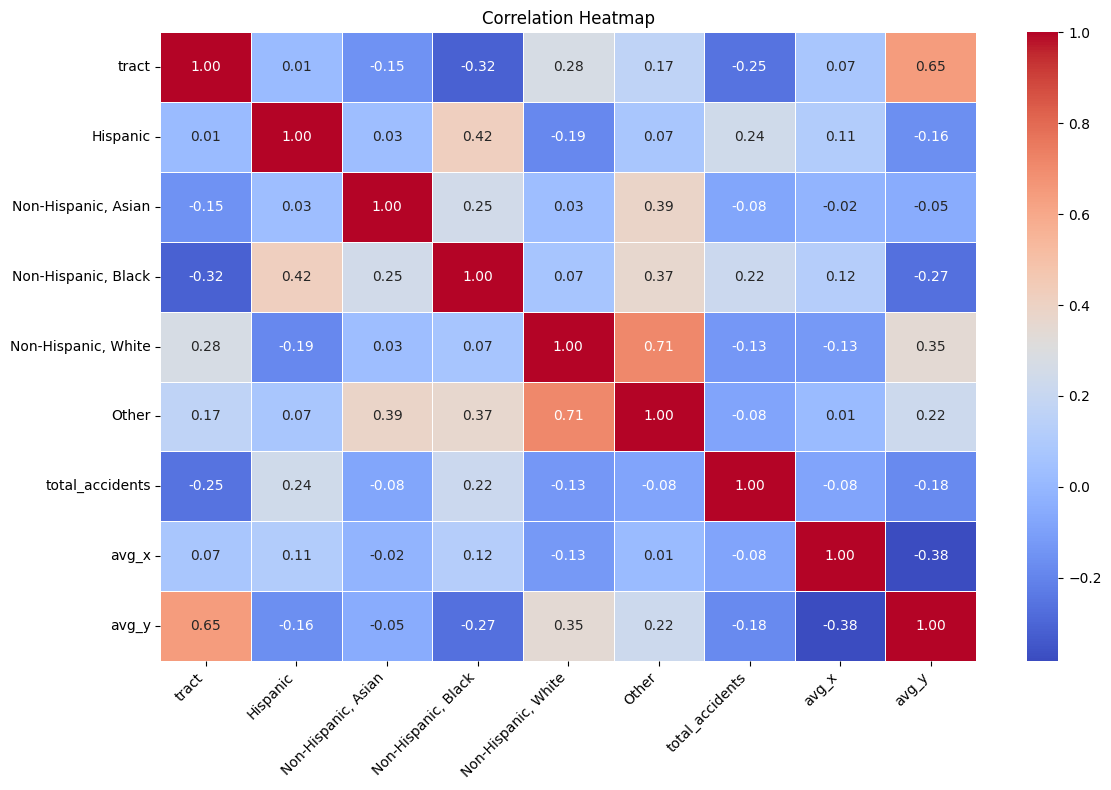

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct file path
file_path = "/content/drive/MyDrive/traffic data/social status merge/aggreated_collision_with_social.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Compute the correlation matrix (numeric columns only)
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load both files
agg = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/aggreated_collision_with_social.csv")
client = pd.read_csv("/content/drive/MyDrive/traffic data/2024_client_count_census.csv")

# Ensure 'tract' is the same type
agg['tract'] = agg['tract'].astype(float)
client['tract'] = client['tract'].astype(float)

# Merge by 'tract' (left join to keep all from agg)
merged = pd.merge(agg, client[['tract', 'Client Count']], on='tract', how='left')

# Fill missing Client Count with 0
merged['Client Count'] = merged['Client Count'].fillna(0).astype(int)

# Show first 10 rows and row count
print(merged.head(10))
print(f"\n📊 Total rows after merge: {len(merged)}")

# Save to file
merged.to_csv("/content/drive/MyDrive/traffic data/social status merge/aggreated_social_with_2024pic_count.csv", index=False)
print("✅ Merged file saved successfully.")



   tract  Hispanic  Non-Hispanic, Asian  Non-Hispanic, Black  \
0   1.00     280.0                129.0                 28.0   
1   2.01     262.0                105.0                 25.0   
2   2.02     746.0                266.0                 75.0   
3   3.01     350.0                153.0                 49.0   
4   3.02     495.0                176.0                 91.0   
5   4.00     728.0                395.0                171.0   
6   5.00     565.0                197.0                 60.0   
7   6.00     590.0                239.0                105.0   
8   7.00     735.0                282.0                127.0   
9   8.00    1218.0                263.0                449.0   

   Non-Hispanic, White  Other  total_accidents       avg_x      avg_y  \
0               2290.0  181.0                7 -117.189822  32.752309   
1               1500.0  109.0               10 -117.170982  32.750002   
2               3063.0  291.0               18 -117.176237  32.745479   
3  

In [ ]:
# Check if there are duplicated tracts in the client dataset
duplicated_tracts = client[client.duplicated(subset='tract', keep=False)].sort_values('tract')

# Show duplicated tracts
if not duplicated_tracts.empty:
    print("⚠️ The following tracts appear more than once in the client data (causing row duplication in merge):")
    print(duplicated_tracts)
else:
    print("✅ No duplicate tracts in client data. The row count should match.")


⚠️ The following tracts appear more than once in the client data (causing row duplication in merge):
        City Names   tract  Client Count
230      San Diego   27.12            23
129    Lemon Grove   27.12             1
11     Chula Vista   32.04             8
136  National City   32.04            10
12     Chula Vista  100.19             5
366      San Diego  100.19             1
367      San Diego  101.03            27
13     Chula Vista  101.03             1
131    Lemon Grove  138.01             9
407  Spring Valley  138.01            17
413  Spring Valley  140.02            11
133    Lemon Grove  140.02             1
58        El Cajon  162.02            58
386         Santee  162.02             2
0         Carlsbad  177.01             1
77       Encinitas  177.01             4
177      Oceanside  194.03             4
418          Vista  194.03             1
6         Carlsbad  198.03            12
178      Oceanside  198.03             8
428          Vista  198.05            

In [ ]:
import pandas as pd

# Load datasets
agg = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/aggreated_collision_with_social.csv")
client = pd.read_csv("/content/drive/MyDrive/traffic data/2024_client_count_census.csv")

# Ensure consistent 'tract' type
agg['tract'] = agg['tract'].astype(float)
client['tract'] = client['tract'].astype(float)

# Step 1: Group by 'tract' to sum Client Count and keep row with max Client Count per tract
# We'll use sort + drop_duplicates to simulate "groupby sum + city with max count"
client_sorted = client.sort_values(['tract', 'Client Count'], ascending=[True, False])
client_grouped = client_sorted.groupby('tract', as_index=False).first()  # Picks the highest count row per tract

# Step 2: Merge with agg
merged = pd.merge(agg, client_grouped[['tract', 'Client Count', 'City Names']], on='tract', how='left')

# Step 3: Fill missing Client Count with 0
merged['Client Count'] = merged['Client Count'].fillna(0).astype(int)

# Step 4: Save result
save_path = "/content/drive/MyDrive/traffic data/social status merge/aggreated_social_with_2024pic_count.csv"
merged.to_csv(save_path, index=False)

# Step 5: Output summary
print(merged.head(10))
print(f"\n📊 Total rows after merge: {len(merged)}")
print("✅ Merged file saved successfully to:", save_path)


   tract  Hispanic  Non-Hispanic, Asian  Non-Hispanic, Black  \
0   1.00     280.0                129.0                 28.0   
1   2.01     262.0                105.0                 25.0   
2   2.02     746.0                266.0                 75.0   
3   3.01     350.0                153.0                 49.0   
4   3.02     495.0                176.0                 91.0   
5   4.00     728.0                395.0                171.0   
6   5.00     565.0                197.0                 60.0   
7   6.00     590.0                239.0                105.0   
8   7.00     735.0                282.0                127.0   
9   8.00    1218.0                263.0                449.0   

   Non-Hispanic, White  Other  total_accidents       avg_x      avg_y  \
0               2290.0  181.0                7 -117.189822  32.752309   
1               1500.0  109.0               10 -117.170982  32.750002   
2               3063.0  291.0               18 -117.176237  32.745479   
3  

In [ ]:
import pandas as pd

# Load the dataset
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_with_census_tract.csv")

# Ensure 'census_tract' is numeric
collisions['census_tract'] = collisions['census_tract'].astype(float)

# Group by census tract
aggregated = collisions.groupby('census_tract').agg(
    total_accidents=('census_tract', 'count'),
    avg_x=('POINT_X', 'mean'),
    avg_y=('POINT_Y', 'mean')
).reset_index()

# Preview the result
print("\n📌 First 10 rows of aggregated data:")
print(aggregated.head(10))

# Show total number of census tracts
print(f"\n📊 Number of unique census tracts: {len(aggregated)}")

# Save the result
aggregated.to_csv("/content/drive/MyDrive/traffic data/aggregated_collisions_by_tract.csv", index=False)



📌 First 10 rows of aggregated data:
   census_tract  total_accidents       avg_x      avg_y
0          1.00                7 -117.189822  32.752309
1          2.01               10 -117.170982  32.750002
2          2.02               18 -117.176237  32.745479
3          3.01               13 -117.163032  32.747222
4          3.02               48 -117.160119  32.746367
5          4.00               95 -117.162038  32.749917
6          5.00               11 -117.150307  32.758922
7          6.00               57 -117.150868  32.750733
8          7.00               28 -117.152802  32.747433
9          8.00               16 -117.142474  32.747608

📊 Number of unique census tracts: 718


In [ ]:
#create population by party race
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_merged_with partydata.csv")

# Step 8: Make sure 'tract' is float in both
collisions['tract'] = collisions['tract'].astype(float)

# Step 8.5: Standardize RACE in collisions
race_mapping = {
    'H': 'Hispanic',
    'W': 'Non-Hispanic, White',
    'B': 'Non-Hispanic, Black',
    'A': 'Non-Hispanic, Asian',
    'O': 'O'
}
collisions['RACE'] = collisions['RACE'].map(race_mapping)

# Step 9: Merge collisions with grouped ethnicity data
merged = collisions.merge(grouped_ethnicity, how='left', on=['tract', 'RACE'])

# Step 10: Rename 'population' column
merged = merged.rename(columns={'population_y': 'population_of_driver_race'})

# Step 11: Show the result
print(merged[['CASE_ID', 'tract', 'RACE', 'population_of_driver_race']].head(20))



    CASE_ID   tract                 RACE  population_of_driver_race
0   5639604   33.05  Non-Hispanic, Black                     1270.0
1   5639619  155.01  Non-Hispanic, White                     3620.0
2   5639726   27.05  Non-Hispanic, Black                      687.0
3   5639817   83.55  Non-Hispanic, Black                      126.0
4   5639818  170.61             Hispanic                      316.0
5   5639826  116.01             Hispanic                     4644.0
6   5639879   91.01  Non-Hispanic, White                     3826.0
7   5639925   78.00             Hispanic                     1350.0
8   5639956  191.09  Non-Hispanic, White                     2318.0
9   5815138  211.02  Non-Hispanic, White                     1363.0
10  5890297  213.06                  NaN                        NaN
11  5895395   51.02  Non-Hispanic, White                     2559.0
12  5899845   83.60  Non-Hispanic, Asian                     2980.0
13  5900550  203.09                    O        

In [ ]:
#add time, year to merge

# Step 1: Load the two datasets
collisions = pd.read_csv("/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population.csv")
crashes = pd.read_csv("/content/drive/MyDrive/traffic data/Ped_Crashes.csv")

# Step 2: Keep only the columns you want from Ped_Crashes
crashes_selected = crashes[['CASE_ID', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME']]

# Step 3: Merge on CASE_ID
merged = collisions.merge(crashes_selected, on='CASE_ID', how='left')

# Step 4: Show some result
print(merged[['CASE_ID', 'ACCIDENT_YEAR', 'COLLISION_DATE', 'COLLISION_TIME']].head(10))

# Step 5: Save the final merged dataset
merged.to_csv("/content/drive/MyDrive/traffic data/social status merge/collisions_with_driver_race_population_with_time.csv", index=False)

print("✅ Saved to /content/drive/MyDrive/traffic data/social status merge/collisions_merged_with_time.csv")



   CASE_ID  ACCIDENT_YEAR COLLISION_DATE  COLLISION_TIME
0  5639604           2013     2013-02-01            1816
1  5639619           2013     2013-01-19             410
2  5639726           2013     2013-02-06            1940
3  5639817           2013     2013-02-18            1937
4  5639818           2013     2013-02-01            1143
5  5639826           2013     2013-01-05            1823
6  5639879           2013     2013-02-04            1826
7  5639925           2013     2013-02-16            2221
8  5639956           2013     2013-01-20            1908
9  5815138           2013     2013-02-20             709
✅ Saved to /content/drive/MyDrive/traffic data/social status merge/collisions_merged_with_time.csv


In [ ]:
# aggreate tract and aggreate race and find total number of accsident of a race in a tract. delete case number and other varaibles
import pandas as pd

# Step 1: Load your latest collisions dataset
#merged = pd.read_csv("/content/drive/MyDrive/traffic data/collisions_with_driver_race_population.csv")

# Step 2: Group by tract and RACE, and count accidents
accident_counts = merged.groupby(['tract', 'RACE']).size().reset_index(name='accident_count')

# Step 3: Show the result
print(accident_counts.head(20))

# Step 4: (Optional) Save the result to CSV
accident_counts.to_csv("/content/drive/MyDrive/traffic data/social status merge/accident_count_by_tract_and_race.csv", index=False)




    tract                 RACE  accident_count
0    1.00             Hispanic               1
1    1.00  Non-Hispanic, Black               1
2    1.00  Non-Hispanic, White               4
3    1.00                    O               1
4    2.01             Hispanic               1
5    2.01  Non-Hispanic, Asian               1
6    2.01  Non-Hispanic, Black               1
7    2.01  Non-Hispanic, White               6
8    2.02             Hispanic               3
9    2.02  Non-Hispanic, Asian               1
10   2.02  Non-Hispanic, Black               1
11   2.02  Non-Hispanic, White              12
12   3.01             Hispanic               2
13   3.01  Non-Hispanic, Asian               1
14   3.01  Non-Hispanic, White               7
15   3.02             Hispanic              12
16   3.02  Non-Hispanic, Asian               1
17   3.02  Non-Hispanic, Black               1
18   3.02  Non-Hispanic, White              25
19   3.02                    O               2


In [ ]:
#Display all VEHICLE_MAKE counts Assuming 'merged' is your final dataframe
vehicle_make_counts = merged['VEHICLE_MAKE'].value_counts(dropna=False)

# Display all VEHICLE_MAKE counts
print(vehicle_make_counts)


VEHICLE_MAKE
-                       7440
TOYOTA                   842
FORD                     831
HONDA                    486
NISSAN                   409
                        ... 
GMC                        1
TSMR                       1
CALIF MOTORCYCLE CO,       1
PORS                       1
MACK                       1
Name: count, Length: 141, dtype: int64
